In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Create new default settings for ALL figures

In [300]:
%%capture

# Send gridlines to back (behind the graphical elements)
plt.rc('axes', axisbelow=True)

# Set figure size
plt.rc('figure', figsize=(10, 5))

# Set gridlines and ticks
plt.rc('axes', grid=True)
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)

#----------------------------------------------------
# I've yet to find a way to set and customise default MINOR and MAJOR gridlines, and so I'll assign them throughout as:    

# plt.grid(which='minor', c='lightgrey')
# plt.grid(which='major', c='grey')
#----------------------------------------------------

# Import dataset

In [301]:
df1 = pd.read_csv('datasets/uber-raw-data-sep14.csv')
df1.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


# Convert datatime into pandas form - !! takes a few minutes !!

In [302]:
df1['Date/Time'] = df1['Date/Time'].map(pd.to_datetime) 
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


# Add 3 columns for day of month, weekday and hour

In [303]:
# Create day of month column
def get_dom(dt):
    return dt.day

df1['dom'] = df1['Date/Time'].map(get_dom)


# Create weekday column
def get_weekday(dt):
    return dt.weekday()

df1['weekday'] = df1['Date/Time'].map(get_weekday)


# Create hour column
def get_hour(dt):
    return dt.hour

df1['hour'] = df1['Date/Time'].map(get_hour)


df1.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


# Plot day of month data as histogram

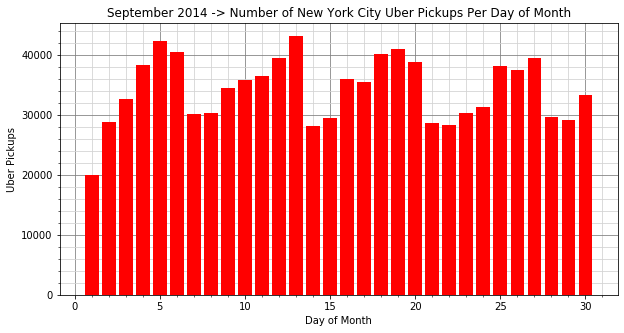

In [304]:
plt.hist(df1.dom, bins=30, rwidth=.8, range=(.5, 30.5), color='r')

plt.title('September 2014 -> Number of New York City Uber Pickups Per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# From df1, sort day of month from least to most pickups

In [305]:
# Count number of rows
by_dom = df1.groupby('dom').apply(len)

by_dom_sorted = by_dom.sort_values()
by_dom_sorted


dom
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

# Plot data 'by_dom_sorted' as line graph

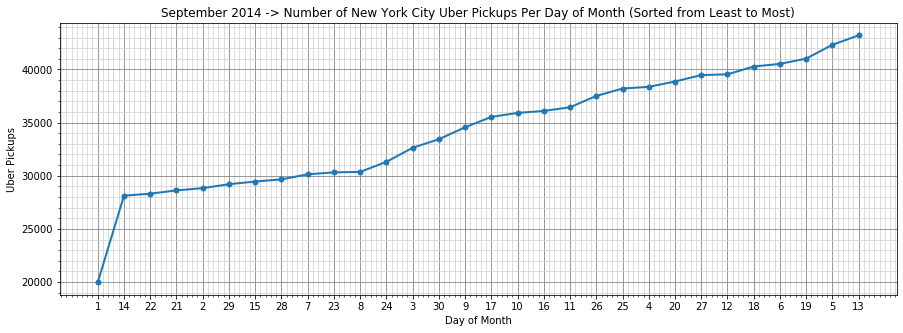

In [307]:
# Increase figure width to better view the x-axis
plt.figure(figsize=(15, 5))

plt.plot(range(1,31), by_dom_sorted, lw=2, marker='.', ms=10)
plt.xticks(range(1, 31), by_dom_sorted.index)

plt.title('September 2014 -> Number of New York City Uber Pickups Per Day of Month (Sorted from Least to Most)')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot weekday data as histogram


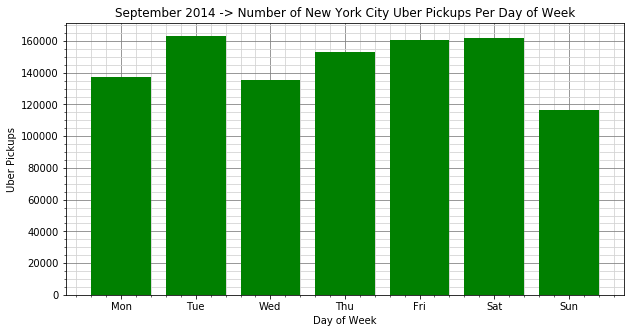

In [308]:
plt.hist(df1.weekday, bins=7, rwidth=.8, range=(-.5, 6.5), color='g')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

plt.title('September 2014 -> Number of New York City Uber Pickups Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot hour data as histogram (24hr axis => 5=5am, 20=8pm)

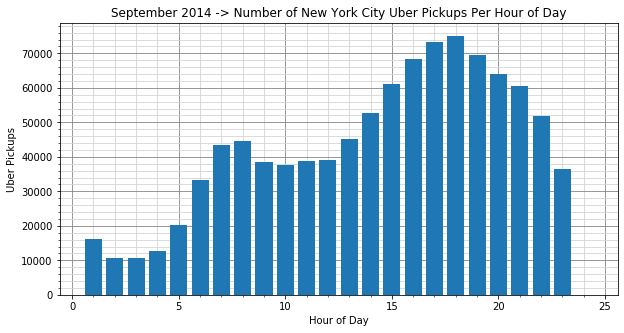

In [309]:
plt.hist(df1.hour, bins=24, rwidth=.8, range=(.5, 24.5))

plt.title('September 2014 -> Number of New York City Uber Pickups Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Cross analysis (hour, day of week)

In [310]:
df2 = df1.groupby('weekday hour'.split()).apply(len).unstack()
df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


# Plot df2 as heatmap

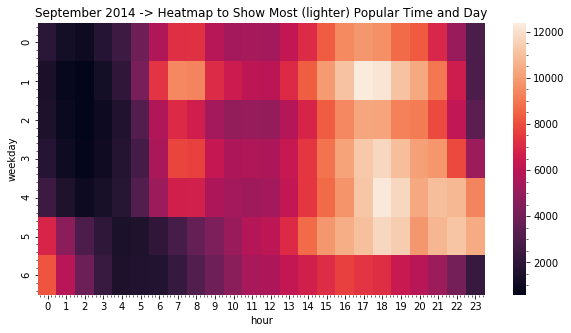

In [311]:
ax = sb.heatmap(df2)

ax.set_title("September 2014 -> Heatmap to Show Most (lighter) Popular Time and Day");

# Plot latitude and longitude data on same graph

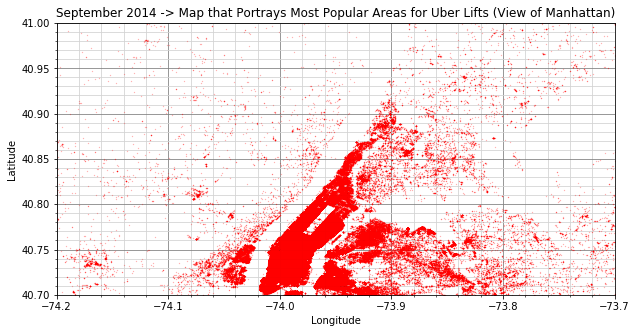

In [313]:
plt.plot(df1['Lon'], df1['Lat'], '.', ms=.5, alpha=.5, c='r')
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

plt.title('September 2014 -> Map that Portrays Most Popular Areas for Uber Lifts (View of Manhattan)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')